In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
df = pd.read_csv('vgsales.csv')

print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df.iloc[3] # third row

Rank                            4
Name            Wii Sports Resort
Platform                      Wii
Year                       2009.0
Genre                      Sports
Publisher                Nintendo
NA_Sales                    15.75
EU_Sales                    11.01
JP_Sales                     3.28
Other_Sales                  2.96
Global_Sales                 33.0
Name: 3, dtype: object

In [6]:
df.loc[0:4, "Name"]

0                  Wii Sports
1           Super Mario Bros.
2              Mario Kart Wii
3           Wii Sports Resort
4    Pokemon Red/Pokemon Blue
Name: Name, dtype: object

In [7]:
df["Platform"].head()

0    Wii
1    NES
2    Wii
3    Wii
4     GB
Name: Platform, dtype: object

In [8]:
df[df["Platform"] == "NES"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
127,128,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
...,...,...,...,...,...,...,...,...,...,...,...
5862,5864,Famista '91,NES,1990.0,Sports,Namco Bandai Games,0.00,0.00,0.30,0.00,0.30
6161,6163,Famista '92,NES,1991.0,Sports,Namco Bandai Games,0.00,0.00,0.28,0.00,0.28
10309,10311,Final Fantasy I & II,NES,1994.0,Role-Playing,Square,0.00,0.00,0.11,0.00,0.11
11985,11987,Teenage Mutant Ninja Turtles: Tournament Fighters,NES,1992.0,Fighting,Konami Digital Entertainment,0.04,0.01,0.02,0.00,0.07


In [9]:
df[(df["Platform"] == "NES") & (df["Genre"] == "Sports")]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
298,299,Golf,NES,1984.0,Sports,Nintendo,1.22,0.28,2.46,0.04,4.01
421,422,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
452,453,World Class Track Meet,NES,1986.0,Sports,Namco Bandai Games,1.92,0.45,0.64,0.07,3.08
638,639,Ice Hockey,NES,1988.0,Sports,Nintendo,1.27,0.32,0.78,0.05,2.42
737,739,Pro Yakyuu Family Stadium,NES,1986.0,Sports,Namco Bandai Games,0.15,0.00,2.05,0.00,2.20
754,756,Tennis,NES,1984.0,Sports,Nintendo,0.48,0.11,1.56,0.02,2.17
759,761,Volleyball,NES,1987.0,Sports,Nintendo,0.14,0.03,1.98,0.00,2.15
868,870,Soccer,NES,1985.0,Sports,Nintendo,0.18,0.23,1.53,0.02,1.96
1278,1280,Nintendo World Cup,NES,1990.0,Sports,Nintendo,0.28,0.50,0.65,0.05,1.48
1361,1363,Pro Yakyuu Family Stadium '87,NES,1987.0,Sports,Namco Bandai Games,0.12,0.00,1.30,0.00,1.42


In [10]:
df[(df["NA_Sales"] >= 0.5) | (df["Genre"] == "Sports")]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16578,16581,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16579,16582,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


In [11]:
df["Publisher"].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Stainless Games                    1
Ivolgamus                          1
Giga                               1
UIG Entertainment                  1
Panther Software                   1
Name: Publisher, Length: 578, dtype: int64

In [12]:
df.groupby(['Publisher', 'Genre'])['Rank'].count()

Publisher             Genre       
10TACLE Studios       Adventure       1
                      Puzzle          1
                      Strategy        1
1C Company            Racing          1
                      Role-Playing    1
                                     ..
imageepoch Inc.       Adventure       1
                      Role-Playing    1
inXile Entertainment  Role-Playing    1
mixi, Inc             Action          1
responDESIGN          Sports          2
Name: Rank, Length: 1825, dtype: int64

In [13]:
df['EU_Sales'].mean()

0.14665200626581515

In [14]:
mean_eu_sales_by_genre = df.groupby('Genre')['EU_Sales'].mean()
mean_eu_sales_by_genre

Genre
Action          0.158323
Adventure       0.049868
Fighting        0.119481
Misc            0.124198
Platform        0.227573
Puzzle          0.087251
Racing          0.190865
Role-Playing    0.126384
Shooter         0.239137
Simulation      0.130773
Sports          0.160635
Strategy        0.066579
Name: EU_Sales, dtype: float64

In [15]:
X = df[['EU_Sales']].values
y = df[["Global_Sales"]].values

In [16]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X, y, epochs=30)

Epoch 1/30
519/519 [==============================] - 2s 2ms/step - loss: 0.6993
Epoch 2/30
519/519 [==============================] - 1s 2ms/step - loss: 0.8201
Epoch 3/30
519/519 [==============================] - 1s 2ms/step - loss: 0.6379
Epoch 4/30
519/519 [==============================] - 1s 2ms/step - loss: 0.6047
Epoch 5/30
519/519 [==============================] - 1s 2ms/step - loss: 1.0153
Epoch 6/30
519/519 [==============================] - 1s 3ms/step - loss: 0.6637
Epoch 7/30
519/519 [==============================] - 2s 3ms/step - loss: 0.6185
Epoch 8/30
519/519 [==============================] - 2s 3ms/step - loss: 1.7852
Epoch 9/30
519/519 [==============================] - 1s 3ms/step - loss: 0.5543
Epoch 10/30
519/519 [==============================] - 1s 3ms/step - loss: 0.7665
Epoch 11/30
519/519 [==============================] - 1s 2ms/step - loss: 0.5705
Epoch 12/30
519/519 [==============================] - 1s 2ms/step - loss: 0.5249
Epoch 13/30
519/519 [====

In [18]:
y_pred = model.predict(X)

519/519 [==============================] - 1s 2ms/step


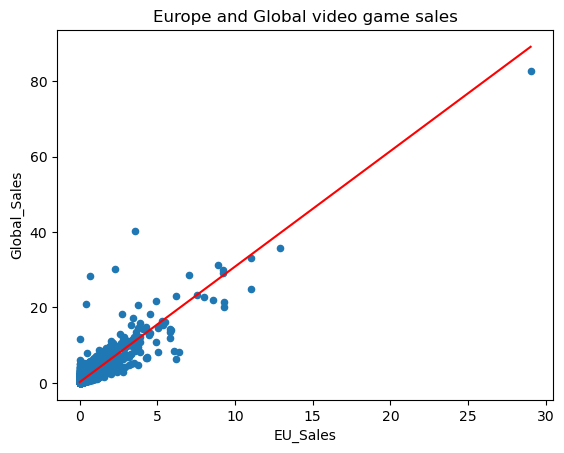

In [27]:
df.plot(kind='scatter',
        x='EU_Sales',
        y='Global_Sales',
        title='Europe and Global video game sales')
plt.plot(X, y_pred, color='red')
plt.show()

In [23]:
theta_0

array([[3.0644734]], dtype=float32)